# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


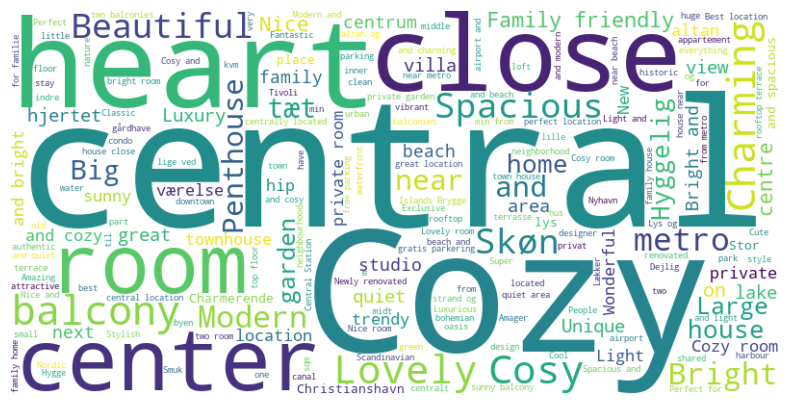

In [1]:
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365"]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace(r'[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

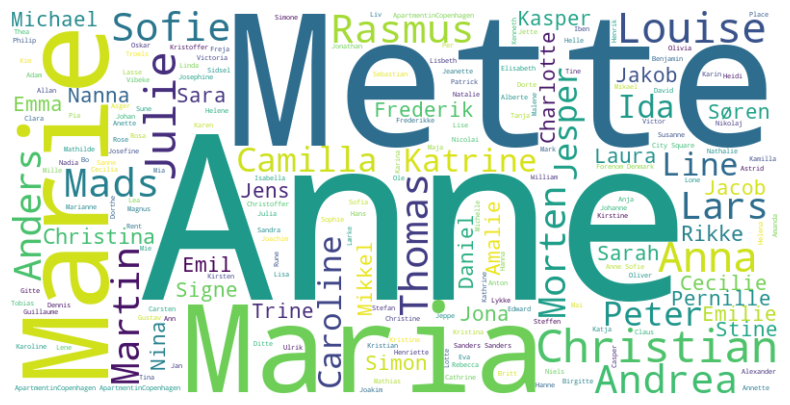

In [ ]:
# State your solution here. Add more cells if needed.

# gonna assume "non-persons" = groups
groups = r"\&| and | og |\+"
individuals = data_filtered[~data_filtered['host_name'].str.lower().str.contains(groups)]

host_names = ' '.join(individuals['host_name'].astype(str))
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(host_names)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

In [3]:
# State your solution here. Add more cells if needed.

import plotly.express as px

data = data_filtered[['longitude', 'latitude']]

fig = px.scatter_mapbox(
    data,
    lat = 'latitude',
    lon = 'longitude',
    title = 'Map of Copenhagen',
    mapbox_style = 'open-street-map',
    zoom = 9,
    center = {'lat': 55.7, 'lon': 12.6}
)

fig.show()

C:\Users\Anna\AppData\Local\Temp\ipykernel_21476\2134294567.py:7: DeprecationWarning: *scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/
  fig = px.scatter_mapbox(


### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

C:\Users\Anna\AppData\Local\Temp\ipykernel_21476\2472800838.py:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



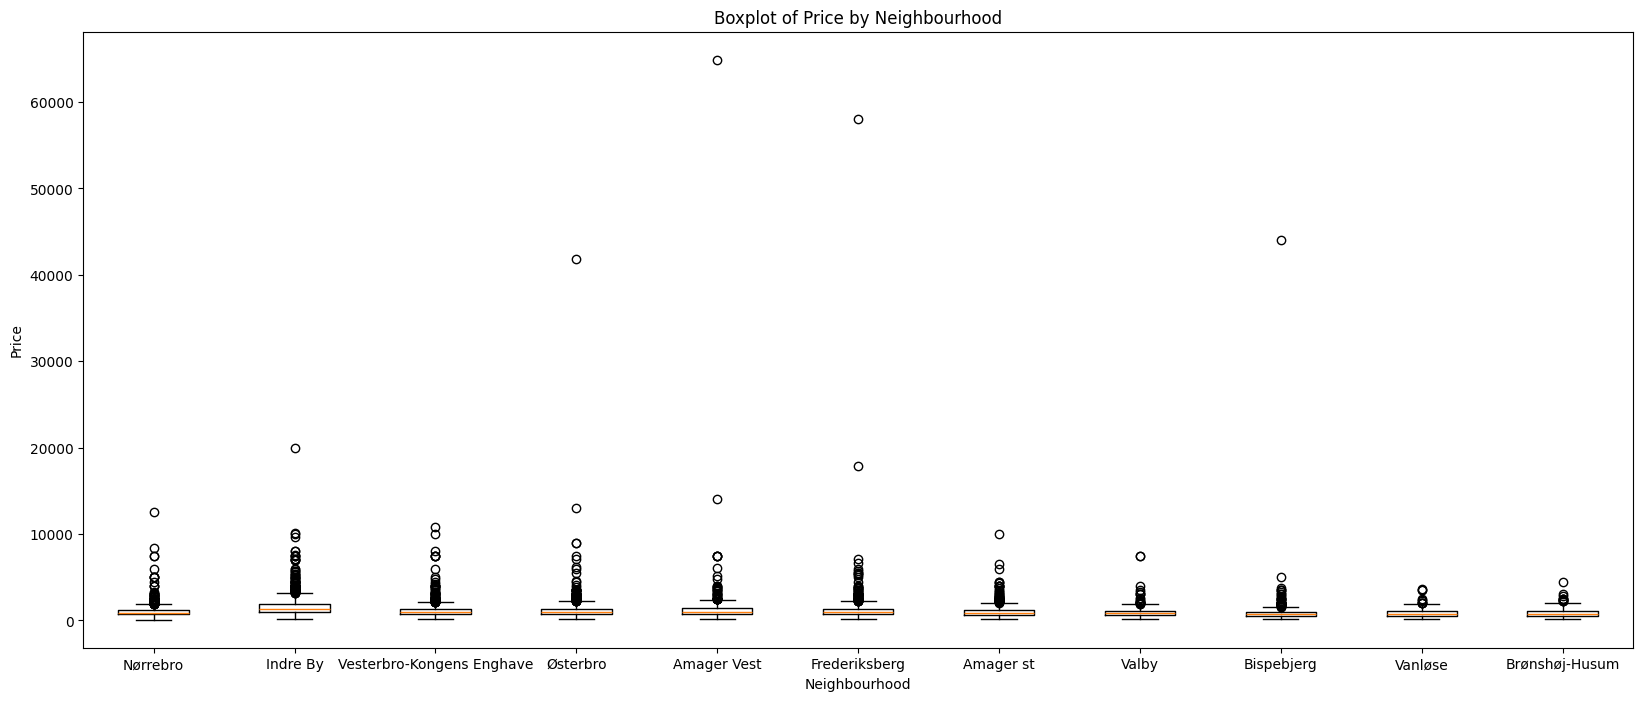

In [4]:
# State your solution here. Add more cells if needed.
plt.figure(figsize=(20, 8))
neighborhoods = sorted(data_filtered['neighbourhood_cleansed'].unique())

plt.boxplot([data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood]['price'] for neighbourhood in neighbourhoods], labels=neighbourhoods)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Boxplot of Price by Neighbourhood')

plt.show()

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [5]:
# State your solution here. Add more cells if needed.
from statistics import mode

neighborhoods = sorted(data_filtered['neighbourhood_cleansed'].unique())
rooms = sorted(data_filtered['room_type'].unique())

def info_for_neighborhood(neighbourhood, data):
    print(neighbourhood)
    analysis = data.groupby(['room_type']).describe().round(2)
    analysis['median'] = data.groupby(['room_type'])['price'].median()
    analysis['mode'] = data.groupby(['room_type'])['price'].agg(lambda x: mode(x))
    display(analysis)

for neighbourhood in neighbourhoods:
    data = data_filtered[data_filtered['neighbourhood_cleansed'] == neighbourhood]
    data = data[['room_type', 'price']]
    info_for_neighborhood(neighbourhood, data)
    print()

Nørrebro


price                                                \
                  count     mean     std    min    25%    50%     75%   
room_type                                                               
Entire home/apt  1889.0  1047.74  583.70  216.0  750.0  950.0  1200.0   
Private room      165.0   650.12  760.27   79.0  400.0  500.0   700.0   
Shared room         3.0   324.67  130.48  174.0  287.0  400.0   400.0   

                         median    mode  
                     max                 
room_type                                
Entire home/apt  12500.0  950.0  1000.0  
Private room      8400.0  500.0   500.0  
Shared room        400.0  400.0   400.0


Indre By


price                                                     \
                  count     mean      std    min      25%     50%      75%   
room_type                                                                    
Entire home/apt  1702.0  1642.39  1072.62  350.0  1021.25  1400.0  1911.00   
Hotel room         10.0  1077.20   654.26  204.0   393.50  1306.0  1553.75   
Private room      128.0   698.98   380.07  165.0   455.25   582.0   840.25   
Shared room         4.0   292.00    67.58  223.0   265.00   280.0   307.00   

                          median    mode  
                     max                  
room_type                                 
Entire home/apt  20000.0  1400.0  1200.0  
Hotel room        1862.0  1306.0  1306.0  
Private room      2093.0   582.0   450.0  
Shared room        385.0   280.0   223.0


Vesterbro-Kongens Enghave


price                                                   \
                  count     mean     std    min     25%     50%      75%   
room_type                                                                  
Entire home/apt  1811.0  1181.44  698.12  300.0  841.00  1000.0  1326.50   
Private room      221.0   574.37  295.73  186.0  414.00   500.0   643.00   
Shared room         2.0   330.50  113.84  250.0  290.25   330.5   370.75   

                          median    mode  
                     max                  
room_type                                 
Entire home/apt  10800.0  1000.0  1000.0  
Private room      2000.0   500.0   500.0  
Shared room        411.0   330.5   250.0


Østerbro


price                                                   \
                  count     mean      std    min    25%     50%      75%   
room_type                                                                  
Entire home/apt  1174.0  1248.55  1438.91  268.0  800.0  1000.0  1400.00   
Private room      130.0   605.46   437.26  200.0  400.0   500.0   679.75   
Shared room         1.0   469.00      NaN  469.0  469.0   469.0   469.00   

                          median    mode  
                     max                  
room_type                                 
Entire home/apt  41800.0  1000.0  1000.0  
Private room      3402.0   500.0   400.0  
Shared room        469.0   469.0   469.0


Amager Vest


price                                                     \
                 count     mean      std    min      25%     50%      75%   
room_type                                                                   
Entire home/apt  909.0  1234.23   832.70  250.0   814.00  1050.0  1480.00   
Private room     148.0  1032.97  5299.02  200.0   400.00   500.0   655.00   
Shared room        2.0  1051.50   112.43  972.0  1011.75  1051.5  1091.25   

                          median    mode  
                     max                  
room_type                                 
Entire home/apt  14000.0  1050.0  1000.0  
Private room     64900.0   500.0   500.0  
Shared room       1131.0  1051.5  1131.0


Frederiksberg


price                                                  \
                  count     mean      std    min    25%     50%     75%   
room_type                                                                 
Entire home/apt  1044.0  1292.47  1958.80  300.0  822.5  1037.0  1400.0   
Private room      133.0   621.71   567.61  185.0  400.0   500.0   700.0   

                          median    mode  
                     max                  
room_type                                 
Entire home/apt  58000.0  1037.0  1000.0  
Private room      5000.0   500.0   500.0


Amager st


price                                                   \
                 count     mean     std     min     25%     50%     75%   
room_type                                                                 
Entire home/apt  791.0  1093.58  721.98   240.0   700.0   900.0  1200.0   
Hotel room         3.0  1296.00  211.18  1149.0  1175.0  1201.0  1369.5   
Private room     129.0   549.33  294.00   135.0   400.0   471.0   600.0   
Shared room        1.0  2575.00     NaN  2575.0  2575.0  2575.0  2575.0   

                          median    mode  
                     max                  
room_type                                 
Entire home/apt  10000.0   900.0  1000.0  
Hotel room        1538.0  1201.0  1201.0  
Private room      2000.0   471.0   450.0  
Shared room       2575.0  2575.0  2575.0


Valby


price                                                        \
                 count     mean     std    min    25%    50%     75%     max   
room_type                                                                      
Entire home/apt  450.0  1017.97  635.43  303.0  699.0  899.0  1200.0  7429.0   
Private room      89.0   498.16  288.62  127.0  307.0  438.0   550.0  2000.0   

                median   mode  
                               
room_type                      
Entire home/apt  899.0  700.0  
Private room     438.0  500.0


Bispebjerg


price                                                         \
                 count    mean      std    min    25%    50%     75%      max   
room_type                                                                       
Entire home/apt  508.0  992.59  1981.58  235.0  600.0  800.0  1000.0  44000.0   
Private room      95.0  488.98   353.67  143.0  300.0  400.0   528.5   3000.0   
Shared room        1.0  198.00      NaN  198.0  198.0  198.0   198.0    198.0   

                median   mode  
                               
room_type                      
Entire home/apt  800.0  700.0  
Private room     400.0  300.0  
Shared room      198.0  198.0


Vanløse


price                                                         \
                 count    mean     std    min     25%    50%      75%     max   
room_type                                                                       
Entire home/apt  254.0  954.43  496.66  269.0  638.75  826.5  1200.00  3643.0   
Private room      44.0  413.41  194.58  200.0  271.50  337.5   500.25  1200.0   

                median   mode  
                               
room_type                      
Entire home/apt  826.5  700.0  
Private room     337.5  300.0


Brønshøj-Husum


price                                                  \
                 count     mean     std    min     25%    50%      75%   
room_type                                                                
Entire home/apt  216.0  1015.00  555.67  250.0  655.75  900.0  1250.00   
Private room      67.0   445.55  201.63  145.0  320.00  400.0   500.00   
Shared room        2.0   211.50   16.26  200.0  205.75  211.5   217.25   

                        median    mode  
                    max                 
room_type                               
Entire home/apt  4462.0  900.0  1400.0  
Private room     1200.0  400.0   500.0  
Shared room       223.0  211.5   223.0

### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = data_filtered.drop(['price_category'], axis='columns')
labels = data_filtered['price_category']

data = data[['neighbourhood_cleansed', 'room_type', 'latitude', 'longitude', 'review_scores_accuracy']]
data_encoded = pd.get_dummies(data, columns=['neighbourhood_cleansed', 'room_type'], drop_first=True) # avoids correlation

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_encoded, labels, test_size=0.2, random_state=42)

# also hyperparams tuning
neighbors_range = range(5, 12)
distance_metrics = ['euclidean', 'manhattan', 'minkowski']

best_accuracy = 0
best_params = {'n_neighbors': None, 'metric': None}

for n_neighbors in neighbors_range:
    for metric in distance_metrics:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)

        knn.fit(X_train, y_train)

        predictions = knn.predict(X_test)

        accuracy = accuracy_score(y_test, predictions)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params['n_neighbors'] = n_neighbors
            best_params['metric'] = metric

print(f"Best parameters: Number of Neighbors - {best_params['n_neighbors']}, Distance Metric - {best_params['metric']}")
print(f"Highest Accuracy: {best_accuracy*100:.2f}%")

# it's better than random selection... neighbourhood and lat/lon don't necessarily correlate cuz you could have a spot at the edge of a neighborhood far away from any attractions. I picked accuracy cuz typically cheaper airbnbs try to hide imperfections, which may lead to lower review accuracy? and room type because it seems like another obvious indicator of how much something would cost regardless of where it's located, so not correlated w lat/lon/neighborhood


Best parameters: Number of Neighbors - 11, Distance Metric - euclidean
Highest Accuracy: 65.70%
